# Step 1: Importing Libraries


In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from glob import glob
import seaborn as sns
from PIL import Image
np.random.seed(123)
from sklearn.preprocessing import label_binarize
from sklearn.metrics import confusion_matrix
import itertools

import keras
from keras.utils.np_utils import to_categorical # used for converting labels to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras import backend as K
import itertools
from keras.layers.normalization import BatchNormalization
from keras.utils.np_utils import to_categorical # convert to one-hot-encoding

from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau
from sklearn.model_selection import train_test_split


Using TensorFlow backend.


In [2]:
#1. Function to plot model's validation loss and validation accuracy
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['acc'])+1),model_history.history['acc'])
    axs[0].plot(range(1,len(model_history.history['val_acc'])+1),model_history.history['val_acc'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['acc'])+1),len(model_history.history['acc'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

In [3]:
import pandas as pd
import numpy as np
import cv2 
import os
import itertools
import shutil
import imutils
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from glob import glob
import matplotlib.pyplot as plt

import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
from plotly import tools

from keras.preprocessing.image import ImageDataGenerator
from keras.applications.vgg16 import VGG16, preprocess_input
from keras import layers
from keras.models import Model, Sequential
from keras.optimizers import Adam, RMSprop
from keras.callbacks import EarlyStopping


# Step 2: Making Dictionary of images & labels

In [4]:
Data = glob('./dataset/**/*.jpg', recursive=True)  #we extract only jpg files

In [5]:
print(len(Data))


1012


In [6]:
from PIL import Image #adds support for opening, manipulating, and saving many different image file formats
from tqdm import tqdm #adds progress bar for the loops
dimentions=list()
x=1
for images in (Data):
    dim = Image.open(images)
    size= dim.size
    if size not in dimentions:
        dimentions.append(size)
        x+=1
    if(x>50): #going through all the images will take up lot of memory, so therefore we will check until we get three different dimentions.
        break
print(dimentions)

[(3046, 2572), (3152, 3000), (2785, 2350), (1716, 1632), (2300, 1900), (2100, 2000), (2592, 1728), (2124, 2056), (1960, 1934), (1444, 1444), (1600, 1216), (3216, 2136), (2592, 1944), (768, 576), (2100, 1592), (2244, 1707), (1440, 1080), (3504, 2336)]


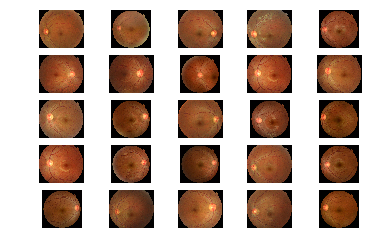

In [7]:
def plot_images(photos) : #to plot multiple image
    x=0
    for image in photos:
        image_cv = cv2.imread(image)
        plt.subplot(5, 5, x+1)
        plt.imshow(cv2.cvtColor(image_cv, cv2.COLOR_BGR2RGB));
        plt.axis('off');
        x+=1
plot_images(Data[:25])

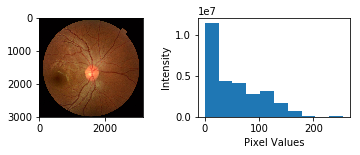

In [8]:
def hist_plot(image): #to plot histogram of pixel values present in an image VS intensities
    img = cv2.imread(image)
    plt.subplot(2, 2,1)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.subplot(2, 2,2)
    plt.hist(img.ravel()) 
    plt.xlabel('Pixel Values')
    plt.ylabel('Intensity')
hist_plot(Data[29])

In [9]:
from tqdm import tqdm
import csv 

Data_output=list()
Data_output.append(["Classes"])

for file_name in tqdm(Data):
#     if file_name[7] == 'G':
#         Data_output.append([file_name[7:13]])
#     elif file_name[7] == 'M':
#         Data_output.append([file_name[7:17]])
#     elif file_name[7] == 'N':
#         Data_output.append([file_name[7:15]])
#     elif file_name[7] == 'P':
#         Data_output.append([file_name[7:16]])
    Data_output.append([file_name[10:12]])
    
with open("./output.csv", "w") as f:
    writer = csv.writer(f)
    for val in Data_output:
        writer.writerows([val])

100%|█████████████████████████████████████████████████████████████████████████| 1012/1012 [00:00<00:00, 1006553.39it/s]


In [10]:
from IPython.display import display # Allows the use of display() for DataFrames
data_output = pd.read_csv("./output.csv")
display(data_output.head())
print(data_output.shape)

,Classes
0,1
1,1
2,1
3,1
4,1


(1012, 1)


# Step 3: Exploratory Data Analysis

C:\Users\acer\Anaconda3\envs\python-cvcourse\lib\site-packages\matplotlib\pyplot.py:522: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).



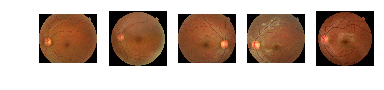

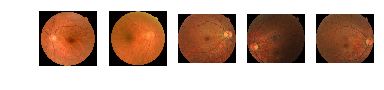

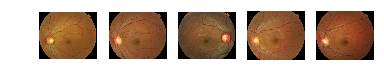

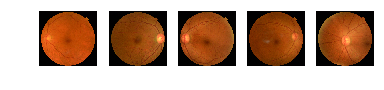

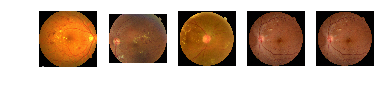

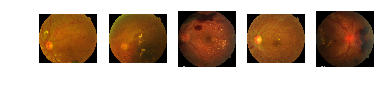

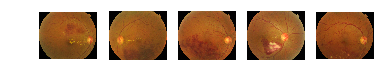

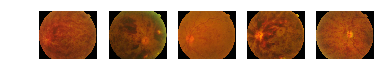

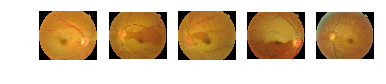

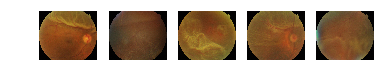

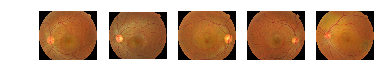

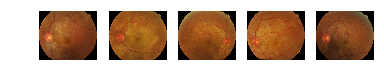

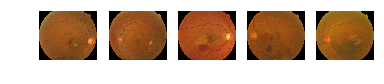

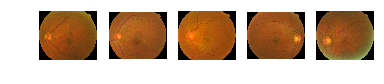

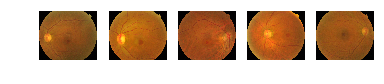

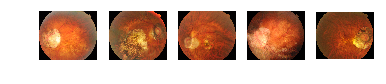

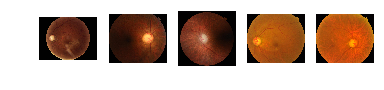

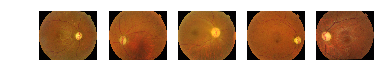

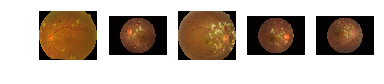

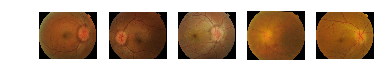

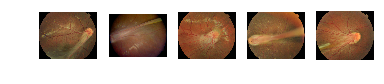

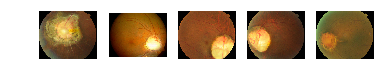

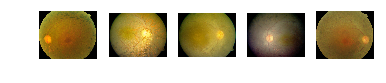

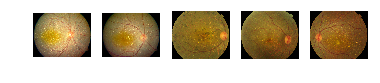

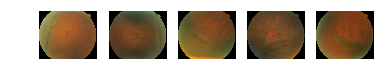

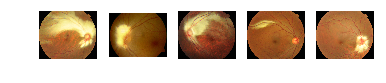

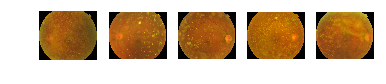

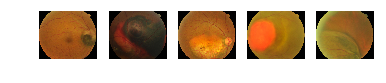

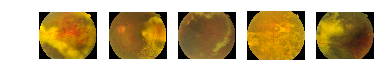

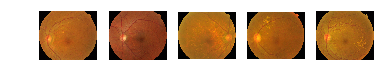

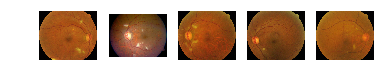

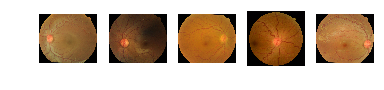

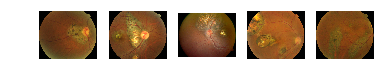

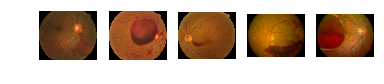

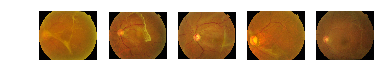

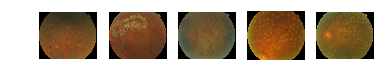

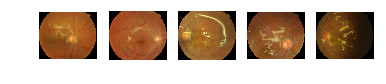

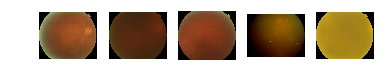

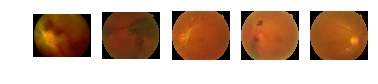

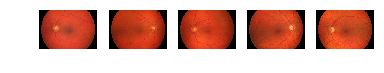

In [11]:
def plot_images(photos) : #to plot multiple image
    x=0

    plt.figure(figsize=(6, 6))
    
    plt.axis('off')    
    
    for image in photos:
        image_cv = cv2.imread(image)
        plt.subplot(1, 5, x+1)
        plt.imshow(cv2.cvtColor(image_cv, cv2.COLOR_BGR2RGB));
        plt.axis('off');
        x+=1
    
#1    
plot_images(Data[:5])
#2
plot_images(Data[40:45])
#3
plot_images(Data[53:58])
#4
plot_images(Data[107:112])
#5
plot_images(Data[121:126])
#6
plot_images(Data[170:175])
#7
plot_images(Data[209:214])
#8
plot_images(Data[257:262])
#9
plot_images(Data[275:280])
#10
plot_images(Data[291:296])
#11
plot_images(Data[349:354])
#12
plot_images(Data[363:368])
#13
plot_images(Data[376:381])
#14
plot_images(Data[451:456])
#15
plot_images(Data[476:481])
#16
plot_images(Data[501:506])
#17
plot_images(Data[554:559])
#18
plot_images(Data[567:572])
#19
plot_images(Data[579:584])
#20
plot_images(Data[594:599])
#21
plot_images(Data[606:611])
#22
plot_images(Data[617:622])
#23
plot_images(Data[627:632])
#24
plot_images(Data[649:654])
#25
plot_images(Data[657:662])
#26
plot_images(Data[670:675])
#27
plot_images(Data[682:687])
#28
plot_images(Data[695:700])
#29
plot_images(Data[704:709])
#30
plot_images(Data[716:721])
#31
plot_images(Data[745:750])
#32
plot_images(Data[755:760])
#33
plot_images(Data[770:775])
#34
plot_images(Data[785:790])
#35
plot_images(Data[795:800])
#36
plot_images(Data[805:810])
#37
plot_images(Data[825:830])
#38
plot_images(Data[845:850])
#39
plot_images(Data[955:960])
#40
plot_images(Data[1000:1005])

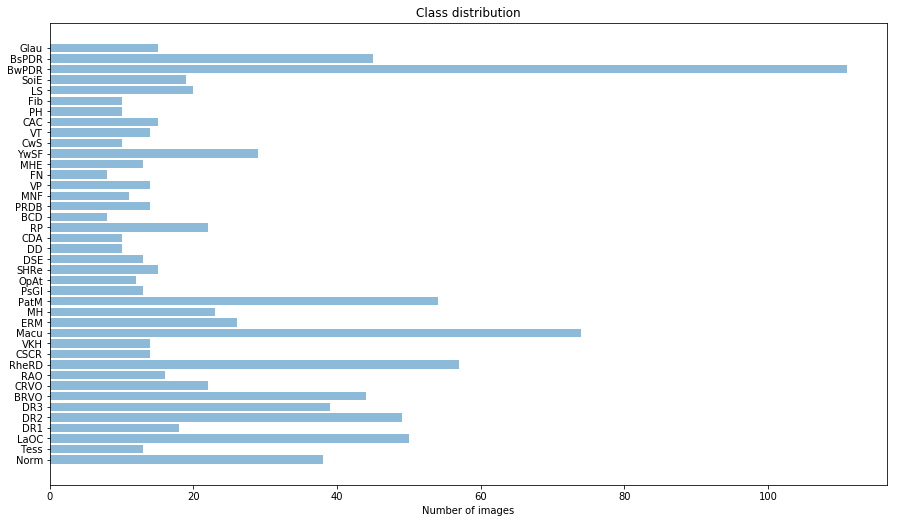

In [12]:
class39= data_output[(data_output["Classes"]==40 )].shape[0]
class38= data_output[(data_output["Classes"]==39 )].shape[0]
class37= data_output[(data_output["Classes"]==38 )].shape[0]
class36= data_output[(data_output["Classes"]==37 )].shape[0]
class35= data_output[(data_output["Classes"]==36 )].shape[0]
class34= data_output[(data_output["Classes"]==35 )].shape[0]
class33= data_output[(data_output["Classes"]==34 )].shape[0]
class32= data_output[(data_output["Classes"]==33 )].shape[0]
class31= data_output[(data_output["Classes"]==32 )].shape[0]
class30= data_output[(data_output["Classes"]==31 )].shape[0]
class29= data_output[(data_output["Classes"]==30 )].shape[0]
class28= data_output[(data_output["Classes"]==29 )].shape[0]
class27= data_output[(data_output["Classes"]==28 )].shape[0]
class26= data_output[(data_output["Classes"]==27 )].shape[0]
class25= data_output[(data_output["Classes"]==26 )].shape[0]
class24= data_output[(data_output["Classes"]==25 )].shape[0]
class23= data_output[(data_output["Classes"]==24 )].shape[0]
class22= data_output[(data_output["Classes"]==23 )].shape[0]
class21= data_output[(data_output["Classes"]==22 )].shape[0]
class20= data_output[(data_output["Classes"]==21 )].shape[0]
class19= data_output[(data_output["Classes"]==20 )].shape[0]
class18= data_output[(data_output["Classes"]==19 )].shape[0]
class17= data_output[(data_output["Classes"]==18 )].shape[0]
class16= data_output[(data_output["Classes"]==17 )].shape[0]
class15= data_output[(data_output["Classes"]==16 )].shape[0]
class14= data_output[(data_output["Classes"]==15 )].shape[0]
class13= data_output[(data_output["Classes"]==14 )].shape[0]
class12= data_output[(data_output["Classes"]==13 )].shape[0]
class11= data_output[(data_output["Classes"]==12 )].shape[0]
class10= data_output[(data_output["Classes"]==11 )].shape[0]
class9 = data_output[(data_output["Classes"]==10 )].shape[0]
class8 = data_output[(data_output["Classes"]== 9 )].shape[0]
class7 = data_output[(data_output["Classes"]== 8 )].shape[0]
class6 = data_output[(data_output["Classes"]== 7 )].shape[0]
class5 = data_output[(data_output["Classes"]== 6 )].shape[0]
class4 = data_output[(data_output["Classes"]== 5 )].shape[0]
class3 = data_output[(data_output["Classes"]== 4 )].shape[0]
class2 = data_output[(data_output["Classes"]== 3 )].shape[0]
class1 = data_output[(data_output["Classes"]== 2 )].shape[0]
class0 = data_output[(data_output["Classes"]== 1 )].shape[0]

objects=["Norm","Tess","LaOC","DR1","DR2","DR3",
         "BRVO","CRVO","RAO","RheRD","CSCR","VKH",
         "Macu","ERM","MH","PatM","PsGl","OpAt","SHRe",
         "DSE","DD","CDA","RP","BCD","PRDB","MNF","VP",
         "FN","MHE","YwSF","CwS","VT","CAC","PH","Fib",
         "LS","SoiE","BwPDR","BsPDR","Glau"]


x_pos = np.arange(len(objects))
count=[class0,class1,class2,class3,class4,
       class5,class6,class7,class8,class9,
       class10,class11,class12,class13,class14,class15,
       class16,class17,class18,class19,class20,class21,
       class22,class23,class24,class25,class26,class27,
       class28,class29,class30,class31,class32,class33,
       class34,class35,class36,class37,class38,class39]
plt.figure(figsize=(15,8.5))
plt.barh(x_pos, count, align='center', alpha=0.5)
plt.yticks(x_pos, objects)
plt.xlabel('Number of images')
plt.title('Class distribution')
plt.show()

In [27]:
sample = []
sample.append(Data[0])
sample.append(Data[40])
sample.append(Data[53])
sample.append(Data[107])
sample.append(Data[121])
sample.append(Data[170])
sample.append(Data[209])
sample.append(Data[257])
sample.append(Data[275])
sample.append(Data[291])
sample.append(Data[349])
sample.append(Data[363])
sample.append(Data[376])
sample.append(Data[451])
sample.append(Data[476])
sample.append(Data[501])
sample.append(Data[554])
sample.append(Data[567])
sample.append(Data[579])
sample.append(Data[594])
sample.append(Data[606])
sample.append(Data[617])
sample.append(Data[627])
sample.append(Data[649])
sample.append(Data[657])
sample.append(Data[670])
sample.append(Data[682])
sample.append(Data[695])
sample.append(Data[704])
sample.append(Data[716])
sample.append(Data[745])
sample.append(Data[755])
sample.append(Data[770])
sample.append(Data[785])
sample.append(Data[795])
sample.append(Data[805])
sample.append(Data[825])
sample.append(Data[845])
sample.append(Data[955])
sample.append(Data[1000])


In [28]:
sample

['./dataset\\01.Normal\\1ffa9627-8d87-11e8-9daf-6045cb817f5b..JPG',
 './dataset\\02.Tessellated fundus\\1ffa9578-8d87-11e8-9daf-6045cb817f5b..JPG',
 './dataset\\03.Large optic cup\\1ffa9497-8d87-11e8-9daf-6045cb817f5b..JPG',
 './dataset\\04.DR1\\1ffa95c3-8d87-11e8-9daf-6045cb817f5b..JPG',
 './dataset\\05.DR2\\1ffa93b4-8d87-11e8-9daf-6045cb817f5b..JPG',
 './dataset\\06.DR3\\1ffa92e5-8d87-11e8-9daf-6045cb817f5b..JPG',
 './dataset\\07.BRVO\\1ffa95f3-8d87-11e8-9daf-6045cb817f5b..JPG',
 './dataset\\08.CRVO\\202efd13-8d87-11e8-9daf-6045cb817f5b..JPG',
 './dataset\\09.RAO\\202efd31-8d87-11e8-9daf-6045cb817f5b..JPG',
 './dataset\\10.Rhegmatogenous RD\\1ffa9340-8d87-11e8-9daf-6045cb817f5b..JPG',
 './dataset\\11.CSCR\\1ffa966f-8d87-11e8-9daf-6045cb817f5b..JPG',
 './dataset\\12.VKH disease\\1ffa93a5-8d87-11e8-9daf-6045cb817f5b..JPG',
 './dataset\\13.Maculopathy\\1ffa9512-8d87-11e8-9daf-6045cb817f5b..JPG',
 './dataset\\14.ERM\\1ffa931a-8d87-11e8-9daf-6045cb817f5b..JPG',
 './dataset\\15.MH\\1ffa92c

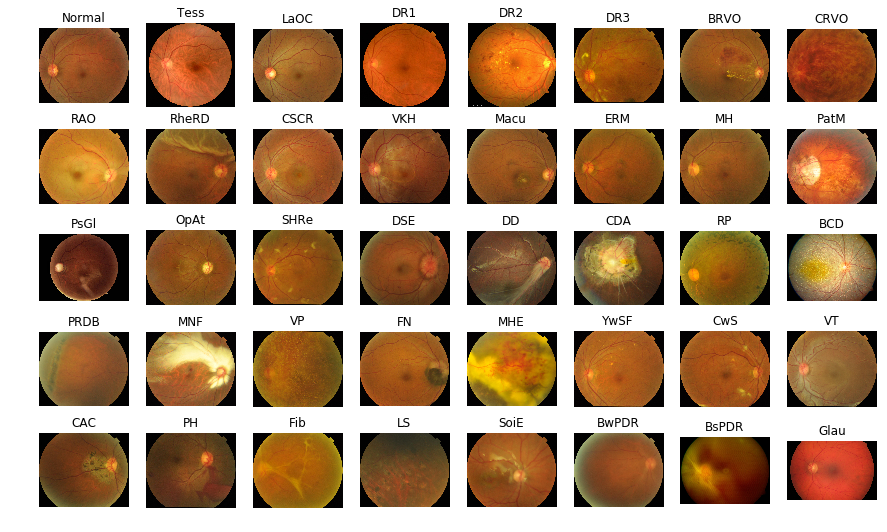

In [53]:
def plot_images(photos, obj) : #to plot multiple image
    x=0
    plt.figure(figsize = (15,9))
    for image in photos:
        image_cv = cv2.imread(image)
        plt.subplot(5, 8, x+1).set_title('{}'.format(obj[x]))
        plt.imshow(cv2.cvtColor(image_cv, cv2.COLOR_BGR2RGB))
        plt.axis('off')
        x+=1

names=["Normal","Tess","LaOC","DR1","DR2","DR3",
         "BRVO","CRVO","RAO","RheRD","CSCR","VKH",
         "Macu","ERM","MH","PatM","PsGl","OpAt","SHRe",
         "DSE","DD","CDA","RP","BCD","PRDB","MNF","VP",
         "FN","MHE","YwSF","CwS","VT","CAC","PH","Fib",
         "LS","SoiE","BwPDR","BsPDR","Glau"]

plot_images(sample[:],names)